### Задание 1:

- Визуализируйте распределение количественных переменных (возраст, уровень холестерина) с помощью box plot и гистограмм.
- Постройте столбчатые диаграммы для анализа распределения категориальных переменных (пол, тип боли в груди).

- Работаем с таблицей https://drive.google.com/drive/folders/1VixOZfS79REbocxz_adU_7U848zFHdxf

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

### Первичный анализ

In [5]:
df_heart = pd.read_csv('data/heart.csv')
df_heart.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [6]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


1. Данные состоят из 303 наблюдений (строк) и 14 переменных (столбцов).
2. Все переменные, кроме 'oldpeak', имеют целочисленный тип данных (int64), что указывает на то, что они могут представлять собой категориальные или дискретные значения.
3. Переменная 'oldpeak' имеет тип float64, что означает, что она содержит непрерывные числовые значения.
4. Нет пропущенных значений в данных, так как для каждой переменной количество non-null значений равно общему количеству наблюдений (303).
5. Переменная 'target' является целевой переменной (зависимой переменной), которую нужно предсказывать или анализировать в зависимости от других переменных.  
6. Переменные 'cp', 'restecg', 'slope', 'ca' и 'thal' представляют собой категориальные переменные, так как имеют целочисленный тип данных.

### Статистические характеристики признаков

Для анализа и интерпретации необходимо преобразовать 9 столбцов (cp, fbs, restecg, slope, sex, ca, thal, exang и target) из числовых в строковый тип данных, несмотря на их числовую природу. Такой вывод основан на рассмотрении типов данных и объяснений функций, представленных ранее.

In [7]:
# Непрерывные признаки
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Признаки объектного типа
features_to_convert = [feature for feature in df_heart.columns if feature not in  continuous_features]

df_heart[features_to_convert] = df_heart[features_to_convert].astype('object')

df_heart.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [8]:
df_heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


На основе представленных статистических данных можно сделать следующие заключения:

1. Возраст (age): Средний возраст пациентов равен приблизительно 54 годам. Самому младшему пациенту 29 лет, а самому старшему – 77. Половина пациентов находится в возрастной группе от 47,5 до 61 года (интерквартильный размах).

2. Артериальное давление (trestbps): Средний показатель артериального давления составляет около 132 мм рт. ст. Минимальное значение – 94 мм рт. ст., максимальное – 200 мм рт. ст. У половины пациентов артериальное давление лежит в диапазоне от 120 до 140 мм рт. ст.

3. Холестерин (chol): Уровень холестерина в среднем составляет около 246 мг/дл. Минимальное значение – 126 мг/дл, максимальное – 564 мг/дл. Половина пациентов имеет уровень холестерина в пределах от 211 до 274,5 мг/дл.

4. Максимальная частота сердечных сокращений (thalach): Средняя максимальная частота сердечных сокращений составляет около 150 ударов в минуту. Минимальное значение – 71 удар в минуту, максимальное – 202. Половина пациентов имеет частоту сердечных сокращений в диапазоне от 133,5 до 166 ударов в минуту.

5. Депрессия сегмента ST (oldpeak): Средний уровень депрессии сегмента ST составляет приблизительно 1,04. Минимальное значение – 0, максимальное – 6,2. У половины пациентов этот показатель находится в пределах от 0 до 1.

In [9]:
df_heart.describe(include='object').T

,count,unique,top,freq
sex,303,2,1,207
cp,303,4,0,143
fbs,303,2,0,258
restecg,303,3,1,152
exang,303,2,0,204
slope,303,3,2,142
ca,303,5,0,175
thal,303,4,2,166
target,303,2,1,165


Анализ категориальных переменных:

1. Пол (sex): В данных присутствуют два уникальных значения, наиболее частое значение - 1 (мужской пол), которое встречается 207 раз.

2. Тип боли в груди (cp): Есть четыре уникальных типа боли в груди, наиболее распространенный тип - 0, который встречается 143 раза.

3. Уровень сахара в крови натощак (fbs): Присутствуют два уникальных значения, наиболее частое значение - 0 (уровень сахара ниже порогового значения), которое встречается 258 раз.

4. Результаты ЭКГ в покое (restecg): Есть три уникальных результата, наиболее распространенный результат - 1, который встречается 152 раза.

5. Наличие стенокардии (exang): Присутствуют два уникальных значения, наиболее частое значение - 0 (отсутствие стенокардии), которое встречается 204 раза.

6. Наклон сегмента ST (slope): Есть три уникальных типа наклона, наиболее распространенный тип - 2, который встречается 142 раза.

7. Количество крупных сосудов (ca): Присутствуют пять уникальных значений, наиболее частое значение - 0 (отсутствие крупных сосудов), которое встречается 175 раз.

8. Талассемия (thal): Есть четыре уникальных типа талассемии, наиболее распространенный тип - 2, который встречается 166 раз.

9. Целевая переменная (target): Присутствуют два уникальных значения, наиболее частое значение - 1, которое встречается 165 раз.

### Одномерный анализ числовых переменных

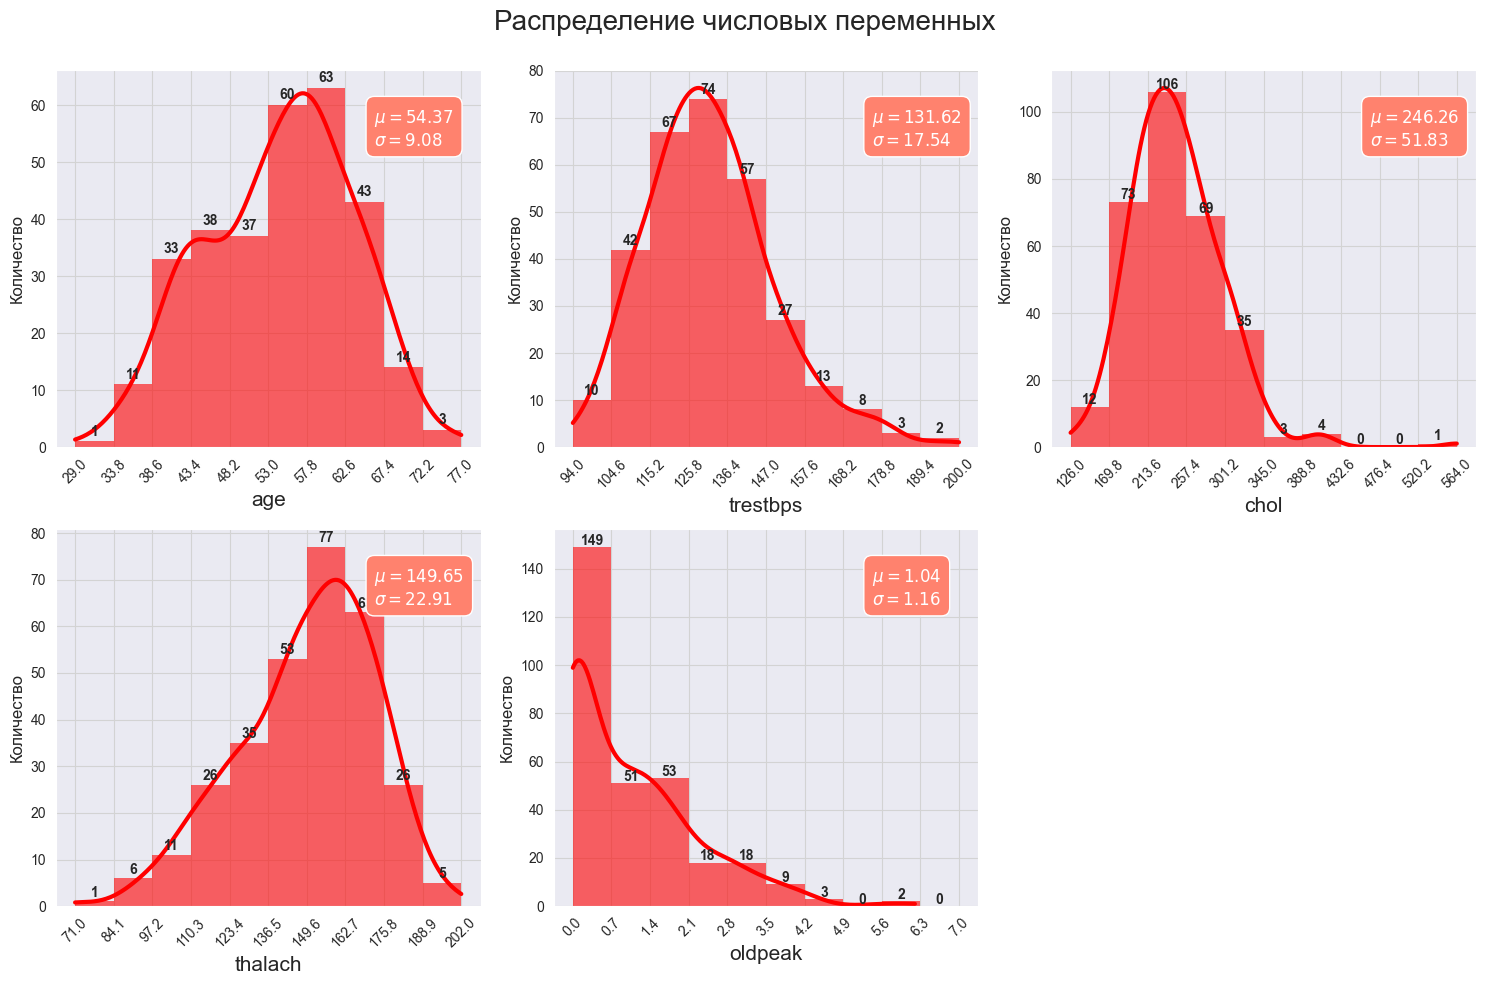

In [10]:
df_continuous = df_heart[continuous_features]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col],
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

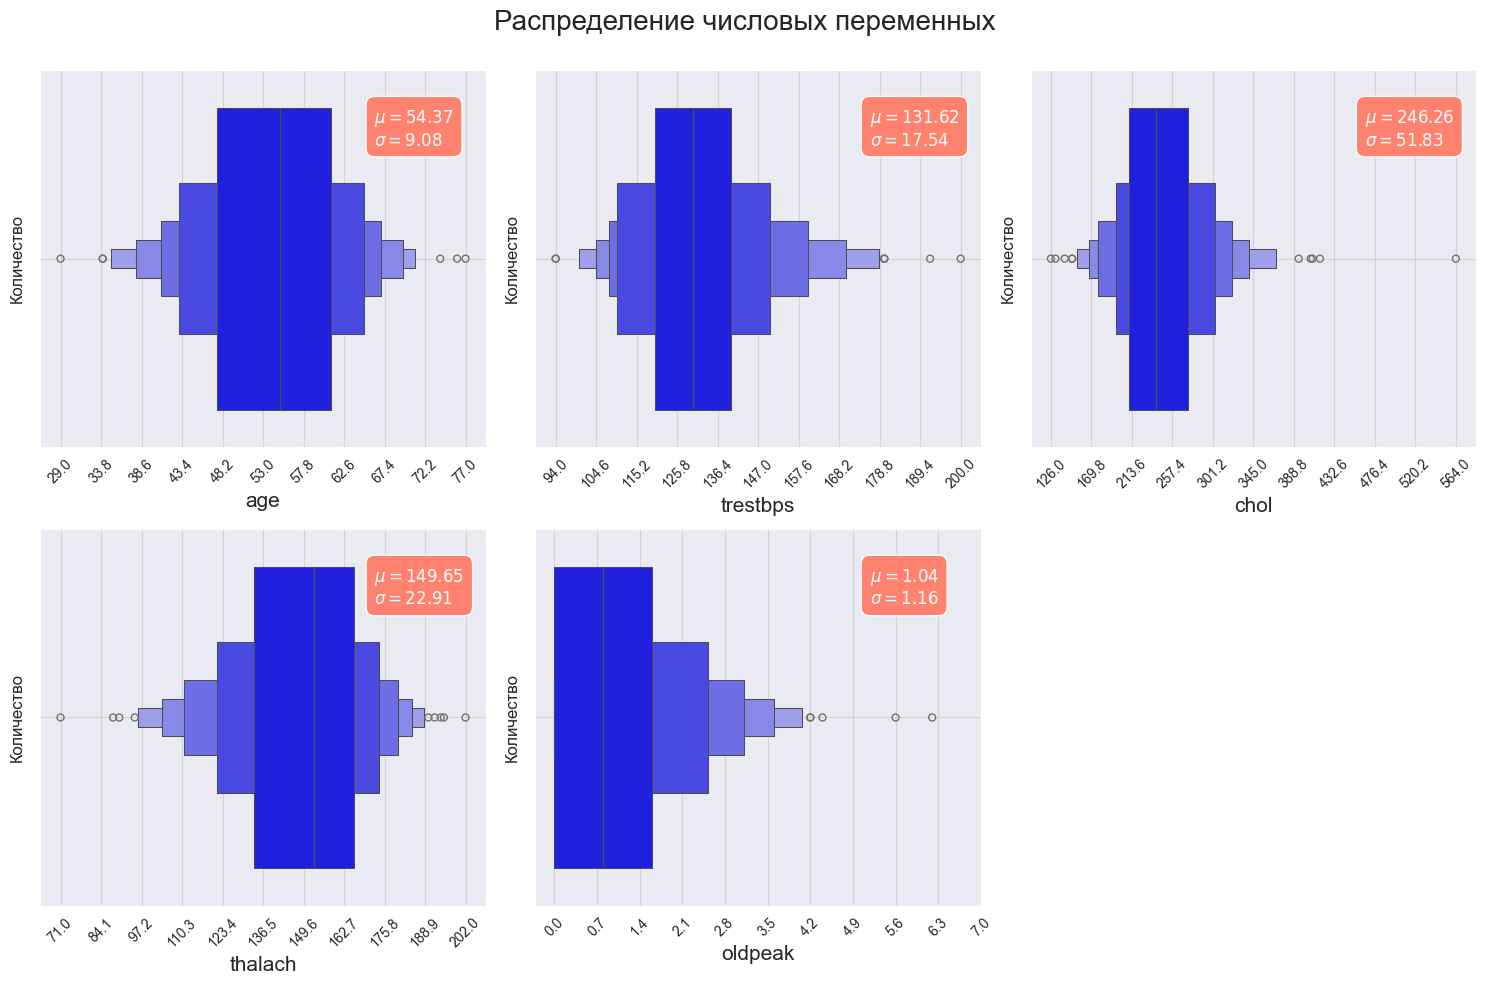

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Цикл для построения гистограмм для каждого непрерывного признака
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col],
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.boxenplot(data=df_continuous, x=col, ax=ax[x, y],
                         color='blue')
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')


    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

1. Первый график слева вверху показывает распределение переменной "age" (возраст). Среднее значение возраста µ = 54.37 лет, стандартное отклонение σ = 9.08 лет. Распределение относительно симметричное, с легким смещением влево, что указывает на небольшое количество молодых участников.

2. Второй график сверху посередине отображает распределение переменной "trestbps" ( кровяное давление в состоянии покоя). Среднее значение составляет µ = 131.62, а стандартное отклонение — σ = 17.54. Это распределение также симметричное, соответствующее нормальному распределению.

3. Третья диаграмма в верхнем правом углу представляет переменную "chol" (холестерин). Среднее значение уровня холестерина составляет µ = 246.26, стандартное отклонение — σ = 51.83. Распределение имеет правостороннюю асимметрию, с некоторым увеличением в области высоких значений.

4. График нижний левый показывает переменную "thalach" (максимальная частота сердцебиений). Здесь среднее µ = 149.65, стандартное отклонение σ = 22.91. Распределение немного скошено влево, что указывает на меньшее количество людей с высокой максимальной частотой сердцебиений.

5. Нижний правый график иллюстрирует переменную "oldpeak", которая, вероятно, связана с уровнем депрессии сегмента ST на ЭКГ после нагрузки. Среднее значение составляет µ = 1.04, стандартное отклонение — σ = 1.16. Распределение oldpeak является сильно асимметричным с длинным правым хвостом, что указывает на значительное количество низких значений и сравнительно малое количество высоких значений.

### Одномерный анализ категориальных признаков

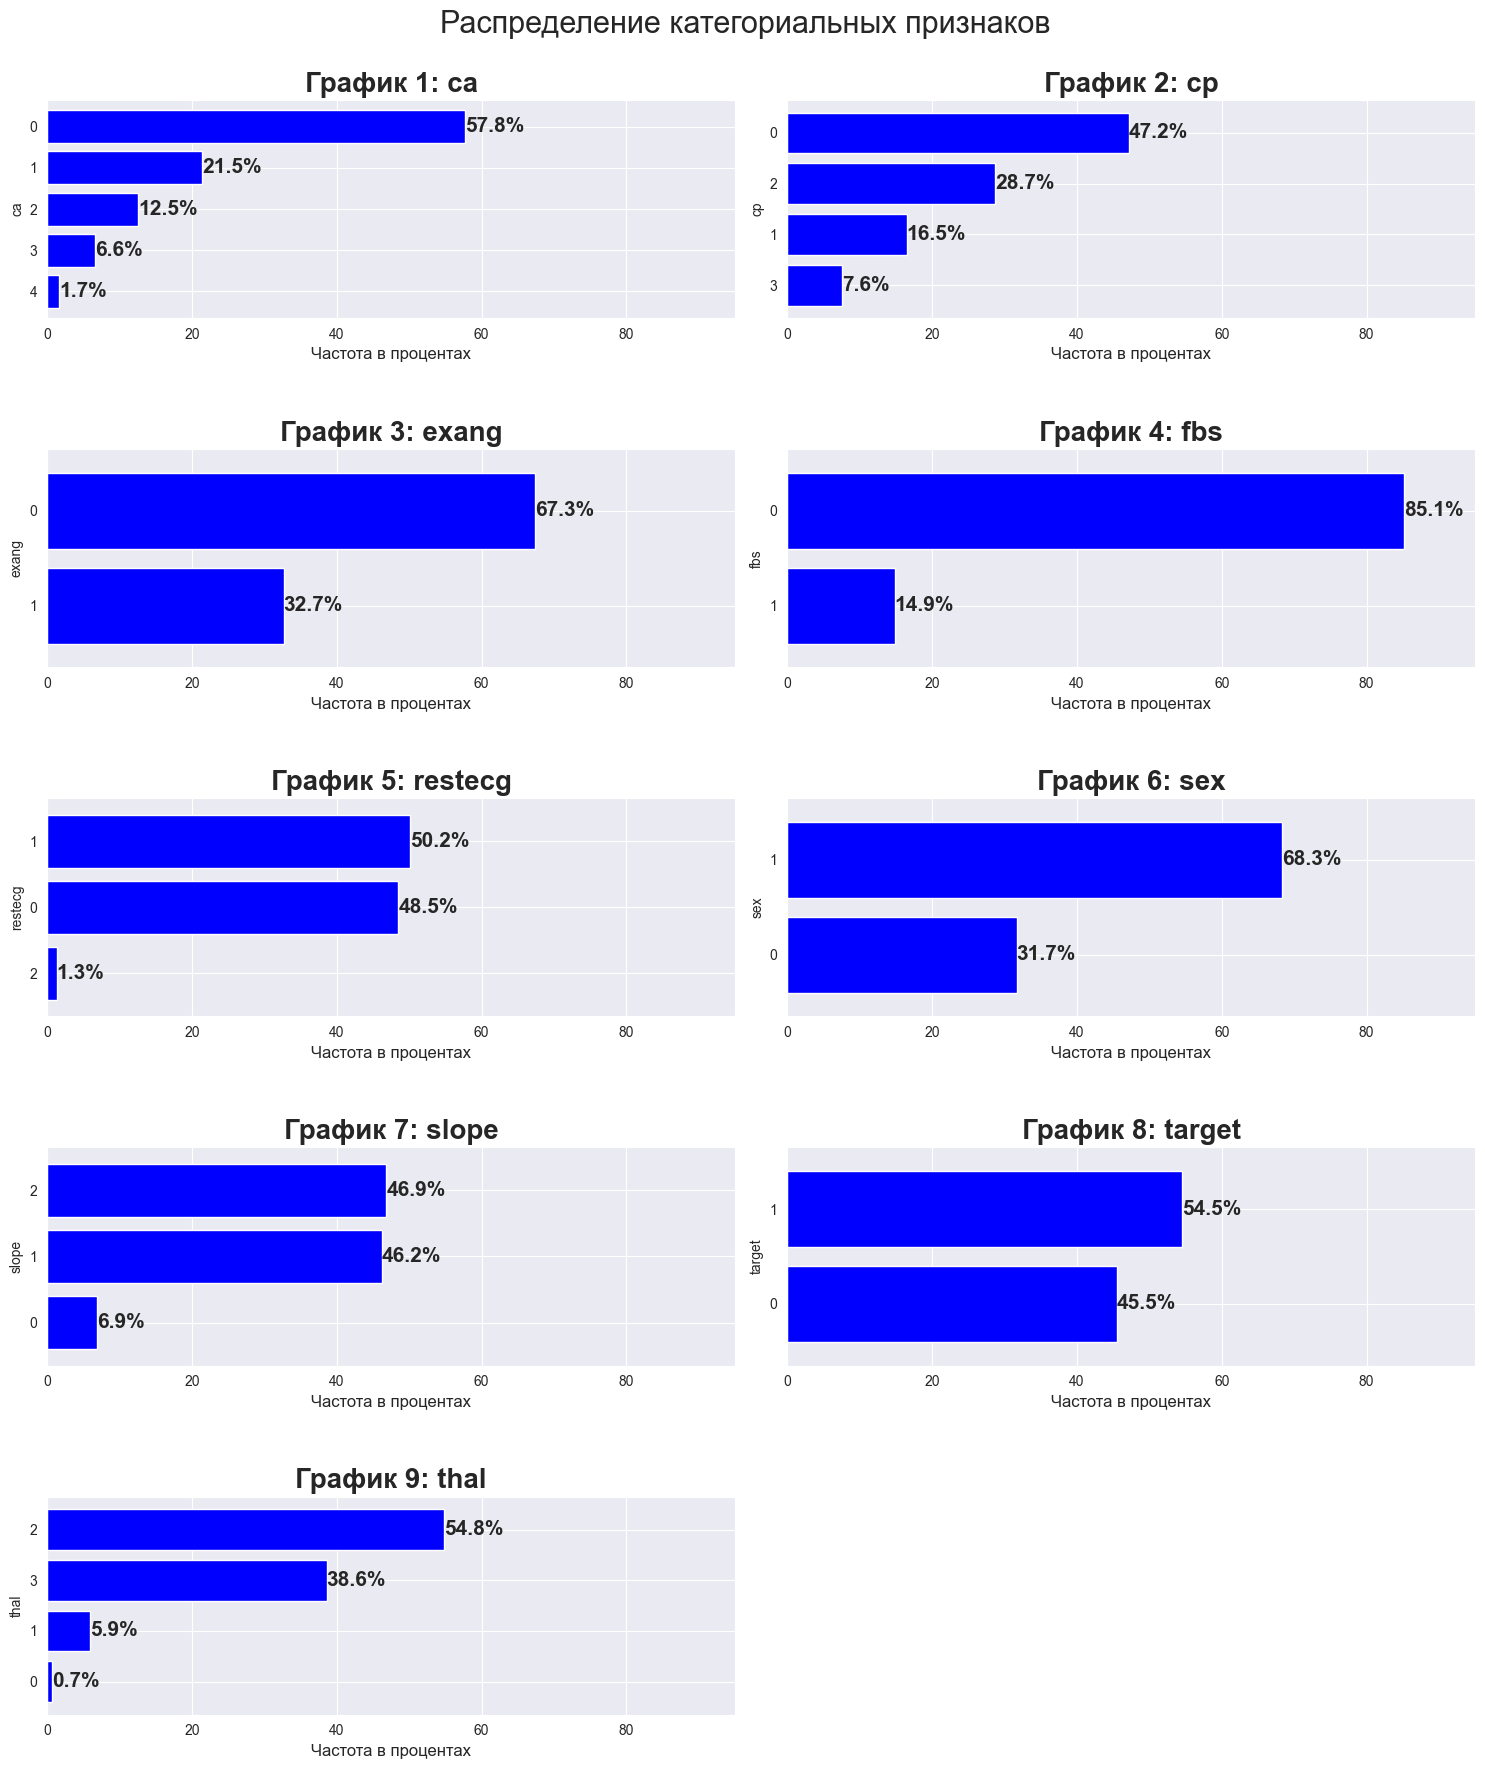

In [12]:
categorical_features = df_heart.columns.difference(continuous_features)
df_categorical = df_heart[categorical_features]

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Цикл для построения столбчатых диаграмм для каждого категориального объекта в макете 5x2
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2

    # Вычисление процентных значений частоты
    value_counts = df_heart[col].value_counts(normalize=True).mul(100).sort_values()

    # Построение столбчатой диаграммы
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='blue')

    # Добавим процентные значения частоты к столбцам
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%',
                              fontsize=15, weight='bold', va='center')

    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Частота в процентах', fontsize=12)
    ax[row, col_idx].set_title(f'График {i+1}: {col}', fontsize=20, weight='bold')

# Отключение последнего пустого графика
ax[4,1].axis('off')

plt.suptitle('Распределение категориальных признаков', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.93, hspace=0.6)
plt.show()

- График 1 `ca`: категория "0" встречается в 57,8% случаев, "1" — в 21,5%, "2" — в 12,5%, "3" — в 6,6% и "4" — в 1,7% случаев.
- График 2 `cp`: тип "0" составляет 47,2%, "1" — 28,7%, "2" — 16,5%, и "3" — 7,6%.
- График 3 `exang`: "0" встречается в 67,3% случаев, и "1" — в 32,7%.
- График 4 `fbs`: "0" составляет 85,1%, и "1" — 14,9%.
- График 5 `restecg`: категория "0" — 50,2%, "1" — 48,5%, и "2" — 1,3%.
- График 6 `sex`: "0" соответствует 31,7% и "1" — 68,3%.
- График 7 `slope`: категория "2" встречается в 46,9% случаев, "1" — в 46,2%, и "0" — в 6,9%.
- График 8 `target`: категория "1" составляет 54,5% и "0" — 45,5%.
- График 9 `thal`: "2" составляет 54,8%, "3" — 38,6%, "1" — в 5,9%, и "0" — 0,7%.


## ----------------------------------------------------------------------------------------------------------------------------------

### Задание 2

Вам предстоит провести эксперименты с моделью машинного обучения и изучить процесс кросс-валидации и подбора гиперпараметров.
Ваша задача состоит в следующем:

1. Загрузите набор данных, подходящий для задачи классификации или регрессии. Вы можете использовать любой набор данных,
предоставленный в библиотеке scikit-learn или другом доступном источнике данных.

2. Разделите данные на обучающую и тестовую выборки с помощью функции train_test_split из библиотеки scikit-learn.

3. Создайте модель машинного обучения, которую вы хотите использовать для предсказания на этом наборе данных. Например, можно
использовать модель линейной регрессии или случайный лес для задачи регрессии, или модель логистической регрессии или случайный
лес для задачи классификации.

4. Используйте метод кросс-валидации, чтобы оценить производительность модели на обучающей выборке. Например, можно
использовать метод cross_val_score из библиотеки scikit-learn с использованием метрики оценки, такой как точность (accuracy) или
среднеквадратичная ошибка (mean squared error).

5. Проведите подбор гиперпараметров модели с помощью методаGridSearchCV из библиотеки scikit-learn. Этот метод позволяет
перебирать различные значения гиперпараметров и выбирать наилучшие значения на основе кросс-валидации.

6. Обучите модель с использованием оптимальных гиперпараметров на обучающей выборке и оцени ее производительность на тестовой
выборке.

7. Проведите анализ результатов и сделай выводы о процессе кросс-валидации и подборе гиперпараметров в задачах машинного
обучения.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

### 1. Load Data

In [14]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target_name'] = None
df['target'] = data.target
df['target_name'] = df['target'].apply(lambda x: data.target_names[x])

shuffle(df, random_state=42).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name,target
73,6.1,2.8,4.7,1.2,versicolor,1
18,5.7,3.8,1.7,0.3,setosa,0
118,7.7,2.6,6.9,2.3,virginica,2
78,6.0,2.9,4.5,1.5,versicolor,1
76,6.8,2.8,4.8,1.4,versicolor,1


### 2. Info & Histogram

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


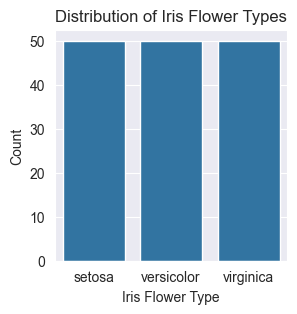

In [16]:
plt.figure(figsize=(3, 3))
sns.countplot(data=df, x='target_name')
plt.title('Distribution of Iris Flower Types')
plt.xlabel('Iris Flower Type')
plt.ylabel('Count')
plt.show()

### 3. Train & Test

In [17]:
X = df.drop(['target', 'target_name'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


### 4. Model (Random Forest)

In [19]:
model = RandomForestClassifier(random_state=42)

### 5. Cross-validation

In [20]:
# Оценка производительности модели с помощью кросс-валидации
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print(f'Cross-validation accuracy scores: {scores.round(4)}')
print(f'Mean accuracy: {scores.mean().round(4)}')

Cross-validation accuracy scores: [0.9583 0.9583 0.8333 1.     0.9583]
Mean accuracy: 0.9417


### 6. GridSearchCV

In [21]:
param_grid = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 6, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_split': [2, 5, 6, 10],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='accuracy')

### 7. Best model

In [22]:
best_params = grid_search.best_params_
model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [23]:
best_params

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

In [24]:
best_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Выведите результаты
print(f'Cross-validation accuracy scores: {best_scores.round(4)}')
print(f'Mean accuracy: {best_scores.mean().round(4)}')

Cross-validation accuracy scores: [0.9583 1.     0.8333 1.     0.9583]
Mean accuracy: 0.95


Значения точности варьируются от 0.8333 до 1.0. Это может указывать на то, что модель имеет хорошую производительность на большинстве фолдов, но в одном из фолдов точность немного ниже.

 Средняя точность 0.95 говорит о том, что модель в среднем правильно классифицирует 95% образцов на обучающих данных. Это хороший показатель.

In [25]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [26]:
# Оценка производительности на тестовой выборке
test_accuracy = best_model.score(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')


Test accuracy: 1.0


In [27]:
# Предсказания и анализ результатов
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

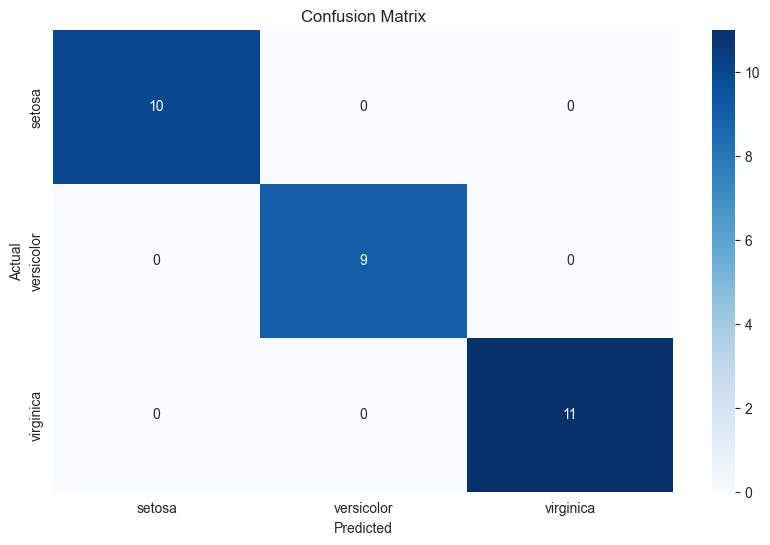

In [28]:
# Отображение матрицы неточностей
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
# Отчет о классификации
class_report = classification_report(y_test, y_pred, target_names=data.target_names)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


<b>Precision (Точность):</b> Это доля правильно предсказанных положительных случаев среди всех случаев, предсказанных как положительные. В данном случае для всех классов (setosa, versicolor, virginica) точность составляет 1.00, что означает, что модель не делает ложных положительных предсказаний.

<b>Recall (Полнота):</b> Это доля правильно предсказанных положительных случаев среди всех настоящих положительных случаев. В данном случае полнота также составляет 1.00 для всех классов, что означает, что модель обнаруживает все положительные случаи.

<b>F1-score:</b> Это среднее гармоническое точности и полноты. Высокий F1-score (1.00) для всех классов говорит о том, что модель хорошо сбалансирована и не имеет проблем с ни одним из классов.

<b>Accuracy (Точность):</b> В данном случае точность составляет 1.00, что означает, что модель правильно классифицировала все 30 образцов в тестовом наборе данных.


Вывод:

Кросс-валидация позволяет оценить стабильность и обобщающую способность модели, тестируя её на разных подмножествах данных. В данном случае наша модель показала стабильную производительность на всех фолдах, что является хорошим признаком.

Подбор гиперпараметров помог оптимизировать параметры модели для достижения наилучших результатов. В нашем случае использовались следующие оптимальные параметры:

* max_depth=10: Глубина деревьев в случайном лесе.
* min_samples_split=2: Минимальное количество образцов, необходимых для разделения узла.
* n_estimators=400: Количество деревьев в лесу.

## ----------------------------------------------------------------------------------------------------------------------------------

### Задание 3

Задание на ознакомление с датасетом:

Необходимо препроцессировать данные, выбрать только содержательные колонки; сделать описательную статистику нескольких параметров;
сформулировать гипотезу о взаимосвязи ваших параметров (например, смертность при раке зависит от пола) и проверить ее с помощью подходящего
метода визуализации.

Если сможете выбрать метод и рассчитать статистику вывода, это будет плюсом

In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

### 1. Load Data

In [31]:
def get_data(name):
    return pd.read_csv(f'data/clinical/{name}.tsv', sep='\t')

dfs = {
    'clinical': get_data('clinical'),
    'exposure': get_data('exposure'),
    'family_history': get_data('family_history'),
    'follow_up': get_data('follow_up'),
    'pathology_detail': get_data('pathology_detail')
}

### 2. Clear Data

In [32]:
def is_dataframe_empty(df):
    """Проверяет, пуст ли DataFrame."""
    return df.empty or df.shape[0] == 0

# Удаление пустых DataFrame из словаря
dfs = {key: df for key, df in dfs.items() if not is_dataframe_empty(df)}

# Показ количества колонок и строк в датафрейме
def show_info_df(obj):
    for key, df in obj.items():
        print(f"{key}: {df.shape[0]} rows, {df.shape[1]} columns")

show_info_df(dfs)

clinical: 106 rows, 158 columns
exposure: 48 rows, 35 columns


In [33]:
# clear empty cols
value_to_filter = "'--"

for key, df in dfs.items():
    # Определяем колонки, где все значения равны value_to_filter
    columns_to_remove = [col for col in df.columns if df[col].eq(value_to_filter).all()]
    
    # Удаляем колонки
    df.drop(columns=columns_to_remove, inplace=True)
    
    # Обновляем DataFrame в словаре
    dfs[key] = df

In [34]:
# Удалим df exposure (мало информации)
if 'exposure' in dfs:
    print(dfs['exposure'].apply(lambda x: x.unique()))

dfs.pop('exposure', None)
show_info_df(dfs)

case_id              [0030a28c-81aa-44b0-8be0-b35e1dcbf98c, 0bf573a...
case_submitter_id    [TCGA-FA-A7Q1, TCGA-FA-A6HN, TCGA-GS-A9U4, TCG...
project_id                                                 [TCGA-DLBC]
alcohol_history                                         [Not Reported]
dtype: object
clinical: 106 rows, 33 columns


In [35]:
df = dfs['clinical']
df.head()

,case_id,case_submitter_id,project_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,...,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,-22454,248,not hispanic or latino,female,asian,Dead,...,no,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,yes,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,-22454,248,not hispanic or latino,female,asian,Dead,...,no,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,no,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,-27025,58,not hispanic or latino,male,asian,Dead,...,no,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,no,"Radiation Therapy, NOS"
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,-27025,58,not hispanic or latino,male,asian,Dead,...,no,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,yes,"Pharmaceutical Therapy, NOS"
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,27,-10075,391,hispanic or latino,female,white,Dead,...,no,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2011,yes,"Pharmaceutical Therapy, NOS"


In [36]:
# Заменяем специальные значения на NaN
pd.set_option('future.no_silent_downcasting', True)

def replace_special_values(df, special_values):
    # Используем метод replace для замены специальных значений
    df = df.replace(special_values, np.nan)
    return df

special_values = ["'--", "not reported"]

df = replace_special_values(df, special_values)

df.apply(lambda x: x.unique())

case_id                             [0030a28c-81aa-44b0-8be0-b35e1dcbf98c, 0bf573a...
case_submitter_id                   [TCGA-FA-A7Q1, TCGA-FA-A6HN, TCGA-GS-A9U4, TCG...
project_id                                                                [TCGA-DLBC]
age_at_index                        [61, 73, 27, 60, 67, 72, 45, nan, 28, 63, 23, ...
days_to_birth                       [-22454, -27025, -10075, -21959, -24590, -2652...
days_to_death                       [248, 58, 391, nan, 595, 6425, 1252, 3553, 708...
ethnicity                           [not hispanic or latino, hispanic or latino, nan]
gender                                                            [female, male, nan]
race                                   [asian, white, nan, black or african american]
vital_status                                                       [Dead, Alive, nan]
year_of_birth                       [1952, 1940, 1984, 1951, 1945, 1959, nan, 1982...
year_of_death                                         

In [37]:
df.shape

(106, 33)

In [38]:
df.apply(lambda x: x.unique())

case_id                             [0030a28c-81aa-44b0-8be0-b35e1dcbf98c, 0bf573a...
case_submitter_id                   [TCGA-FA-A7Q1, TCGA-FA-A6HN, TCGA-GS-A9U4, TCG...
project_id                                                                [TCGA-DLBC]
age_at_index                        [61, 73, 27, 60, 67, 72, 45, nan, 28, 63, 23, ...
days_to_birth                       [-22454, -27025, -10075, -21959, -24590, -2652...
days_to_death                       [248, 58, 391, nan, 595, 6425, 1252, 3553, 708...
ethnicity                           [not hispanic or latino, hispanic or latino, nan]
gender                                                            [female, male, nan]
race                                   [asian, white, nan, black or african american]
vital_status                                                       [Dead, Alive, nan]
year_of_birth                       [1952, 1940, 1984, 1951, 1945, 1959, nan, 1982...
year_of_death                                         

In [39]:
# Удалим все колонки в кторых уникальные значения только типа
# '--, No, not reported, 0
values_to_check = ["'--", "No", "no", "not reported", "0", np.nan]

def remove_columns_with_only_specific_values(df, values):
    columns_to_remove = []
    
    for column in df.columns:
        unique_values = set(df[column].unique())
        if unique_values.issubset(set(values)):
            columns_to_remove.append(column)
    
    return df.drop(columns=columns_to_remove)

df = remove_columns_with_only_specific_values(df, values_to_check)

df.shape

(106, 26)

In [40]:
# Удалим неинформативные строки
non_identifier_cols = ['age_at_index', 'days_to_birth', 'days_to_death', 'ethnicity', 'gender',
                        'race', 'vital_status', 'year_of_birth', 'year_of_death', 'age_at_diagnosis',
                        'ann_arbor_b_symptoms', 'ann_arbor_clinical_stage', 'ann_arbor_extranodal_involvement',
                        'days_to_last_follow_up', 'icd_10_code', 'morphology', 'primary_diagnosis',
                        'prior_treatment', 'site_of_resection_or_biopsy', 'tissue_or_organ_of_origin',
                        'year_of_diagnosis', 'treatment_or_therapy', 'treatment_type']

# Удаление строк, где все значения в non_identifier_cols равны NaN
df = df[~df[non_identifier_cols].isna().all(axis=1)]
df.shape

(96, 26)

In [41]:
# Определение столбцов, которые нужно удалить (если одно уникальное значение)
def get_columns_to_remove(df):
    columns_to_remove = []
    
    for column in df.columns:
        unique_values = df[column].unique()
        # Проверка, состоит ли столбец только из одного уникального значения
        if len(unique_values) == 1:
            columns_to_remove.append(column)
    
    return columns_to_remove

columns_to_remove = get_columns_to_remove(df)
print(f'Stub column names to remove: {columns_to_remove}')

df = df.drop(columns=columns_to_remove)

Stub column names to remove: ['project_id', 'morphology', 'primary_diagnosis']


In [42]:
# Delete column if Nan > 20%
nan_percentage = df.isna().mean() * 100
columns_to_drop = nan_percentage[nan_percentage > 20].index

print(df['ann_arbor_clinical_stage'].isna().mean() * 100)
print("Удаленные колонки:")
print(columns_to_drop)
print("\nОчищенный DataFrame:")
print(df)

12.5
Удаленные колонки:
Index(['days_to_death', 'year_of_death'], dtype='object')

Очищенный DataFrame:
                                  case_id case_submitter_id age_at_index  \
0    0030a28c-81aa-44b0-8be0-b35e1dcbf98c      TCGA-FA-A7Q1           61   
1    0030a28c-81aa-44b0-8be0-b35e1dcbf98c      TCGA-FA-A7Q1           61   
2    0bf573ac-cd1e-42d8-90cf-b30d7b08679c      TCGA-FA-A6HN           73   
3    0bf573ac-cd1e-42d8-90cf-b30d7b08679c      TCGA-FA-A6HN           73   
4    0e251c03-bf86-4ed8-b45d-3cbc97160502      TCGA-GS-A9U4           27   
..                                    ...               ...          ...   
101  f8cf647b-1447-4ac3-8c43-bef07765cabf      TCGA-G8-6326           52   
102  f978cb0f-d319-4c01-b4c5-23ae1403a106      TCGA-FF-8047           38   
103  f978cb0f-d319-4c01-b4c5-23ae1403a106      TCGA-FF-8047           38   
104  fdecb74f-ac4e-46b1-b23a-5f7fde96ef9f      TCGA-GS-A9U3           77   
105  fdecb74f-ac4e-46b1-b23a-5f7fde96ef9f      TCGA-GS-A9U3 

In [43]:
df.apply(lambda x: x.unique())

case_id                             [0030a28c-81aa-44b0-8be0-b35e1dcbf98c, 0bf573a...
case_submitter_id                   [TCGA-FA-A7Q1, TCGA-FA-A6HN, TCGA-GS-A9U4, TCG...
age_at_index                        [61, 73, 27, 60, 67, 72, 45, 28, 63, 23, 46, 5...
days_to_birth                       [-22454, -27025, -10075, -21959, -24590, -2652...
days_to_death                       [248, 58, 391, nan, 595, 6425, 1252, 3553, 708...
ethnicity                                [not hispanic or latino, hispanic or latino]
gender                                                                 [female, male]
race                                        [asian, white, black or african american]
vital_status                                                            [Dead, Alive]
year_of_birth                       [1952, 1940, 1984, 1951, 1945, 1959, 1982, 194...
year_of_death                                           [nan, 2012, 2001, 2004, 2009]
age_at_diagnosis                    [22454, 27025, 100

In [44]:
cols_with_nan = df.columns[df.isna().any()].tolist()
cols_with_nan

['days_to_death',
 'year_of_death',
 'ann_arbor_b_symptoms',
 'ann_arbor_clinical_stage',
 'ann_arbor_extranodal_involvement',
 'days_to_last_follow_up',
 'treatment_or_therapy']

In [45]:
# Заполнение NaN значений
df['ann_arbor_b_symptoms'] = df['ann_arbor_b_symptoms'].fillna('Unknown')
df['ann_arbor_clinical_stage'] = df['ann_arbor_clinical_stage'].fillna('Unknown')
df['ann_arbor_extranodal_involvement'] = df['ann_arbor_extranodal_involvement'].fillna('Unknown')
df['treatment_or_therapy'] = df['treatment_or_therapy'].fillna('Unknown')

# Преобразование столбца в числовой тип
df['days_to_last_follow_up'] = pd.to_numeric(df['days_to_last_follow_up'], errors='coerce')
df['days_to_death'] = pd.to_numeric(df['days_to_death'], errors='coerce')
df['year_of_death'] = pd.to_numeric(df['year_of_death'], errors='coerce')

# Заполнение NaN значений медианой для числового столбца
median_days_to_last_follow_up = df['days_to_last_follow_up'].median()
df['days_to_last_follow_up'] = df['days_to_last_follow_up'].fillna(median_days_to_last_follow_up)

median_days_to_death = df['days_to_death'].median()
df['days_to_death'] = df['days_to_death'].fillna(median_days_to_death)

median_year_of_death = df['year_of_death'].median()
df['year_of_death'] = df['year_of_death'].fillna(median_year_of_death)

In [46]:
df.isna().any().any()

False

In [47]:
df.apply(lambda x: x.unique())

case_id                             [0030a28c-81aa-44b0-8be0-b35e1dcbf98c, 0bf573a...
case_submitter_id                   [TCGA-FA-A7Q1, TCGA-FA-A6HN, TCGA-GS-A9U4, TCG...
age_at_index                        [61, 73, 27, 60, 67, 72, 45, 28, 63, 23, 46, 5...
days_to_birth                       [-22454, -27025, -10075, -21959, -24590, -2652...
days_to_death                       [248.0, 58.0, 391.0, 595.0, 6425.0, 1252.0, 35...
ethnicity                                [not hispanic or latino, hispanic or latino]
gender                                                                 [female, male]
race                                        [asian, white, black or african american]
vital_status                                                            [Dead, Alive]
year_of_birth                       [1952, 1940, 1984, 1951, 1945, 1959, 1982, 194...
year_of_death                                        [2009.0, 2012.0, 2001.0, 2004.0]
age_at_diagnosis                    [22454, 27025, 100

In [48]:
# work with treatment_type & treatment_or_therapy

def check_treatment_consistency(df):
    # Создаем таблицу соответствий между treatment_or_therapy и treatment_type
    treatment_consistency = df.groupby('treatment_or_therapy')['treatment_type'].unique().reset_index()
    treatment_consistency.columns = ['treatment_or_therapy', 'treatment_types']
    
    return treatment_consistency

# Проверить соответствие
treatment_consistency = check_treatment_consistency(df)

treatment_consistency

,treatment_or_therapy,treatment_types
0,Unknown,"[Radiation Therapy, NOS, Pharmaceutical Therap..."
1,no,"[Radiation Therapy, NOS, Pharmaceutical Therap..."
2,yes,"[Pharmaceutical Therapy, NOS, Radiation Therap..."


In [49]:
df['treatment_or_therapy'] = df['treatment_or_therapy'].replace('Unknown', 'no')
treatment_consistency = check_treatment_consistency(df)
treatment_consistency

,treatment_or_therapy,treatment_types
0,no,"[Radiation Therapy, NOS, Pharmaceutical Therap..."
1,yes,"[Pharmaceutical Therapy, NOS, Radiation Therap..."


In [50]:
# create treatment_category
df['treatment_category'] = df['treatment_or_therapy'] + ' - ' + df['treatment_type']

# unique categories
category_mapping = {
    'no - Radiation Therapy, NOS': 0,
    'no - Pharmaceutical Therapy, NOS': 1,
    'yes - Radiation Therapy, NOS': 2,
    'yes - Pharmaceutical Therapy, NOS': 3
}

df['treatment_category'] = df['treatment_category'].map(category_mapping)

# drop treatment_or_therapy, treatment_type
df = df.drop(columns=['treatment_or_therapy', 'treatment_type'])

In [51]:
# remove duplicate rows

# Группировка по 'case_id' и преобразование значений в список
grouped = df.groupby('case_id')['treatment_category'].apply(lambda x: tuple(sorted(x))).reset_index(name='sorted_treatment_category')

# Создание словаря уникальных пар и присвоение уникальных индексов
unique_pairs = {v: i for i, v in enumerate(sorted(grouped['sorted_treatment_category'].unique()))}
grouped['treatment_group'] = grouped['sorted_treatment_category'].map(unique_pairs)

# Объединение с исходным DataFrame
df = df.merge(grouped[['case_id', 'treatment_group']], on='case_id', how='left')

# Удаление столбца 'treatment_category'
df = df.drop(columns='treatment_category')

# Удаление дубликатов, оставив только одну строку для каждого case_id
df = df.drop_duplicates()

df.head(12)

,case_id,case_submitter_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,...,ann_arbor_b_symptoms,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,days_to_last_follow_up,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_group
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248.0,not hispanic or latino,female,asian,Dead,1952,...,No,Stage I,No,22.0,C48.1,No,Intra-abdominal lymph nodes,Intra-abdominal lymph nodes,2013,1
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,73,-27025,58.0,not hispanic or latino,male,asian,Dead,1940,...,No,Unknown,No,6.0,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2013,1
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,27,-10075,391.0,hispanic or latino,female,white,Dead,1984,...,No,Stage II,No,832.0,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2011,1
6,0e9fcccc-0630-408d-a121-2c6413824cb7,TCGA-FF-8062,60,-21959,595.0,not hispanic or latino,female,asian,Alive,1951,...,No,Stage I,Yes,679.0,C83.3,No,Thyroid gland,Thyroid gland,2011,1
8,1843c82e-7a35-474f-9f79-c0a9af9aa09c,TCGA-FA-A4BB,67,-24590,595.0,not hispanic or latino,male,white,Alive,1945,...,Yes,Stage IV,Yes,132.0,C83.3,No,Lymph nodes of axilla or arm,Lymph nodes of axilla or arm,2012,1
10,1d0db5d7-39ca-466d-96b3-0d278c5ea768,TCGA-FF-A7CW,72,-26520,595.0,not hispanic or latino,male,asian,Alive,1940,...,No,Stage II,Yes,791.0,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2012,1
12,1ea575f1-f731-408b-a629-f5f4abab569e,TCGA-GS-A9TU,45,-16720,595.0,hispanic or latino,male,white,Alive,1959,...,No,Stage II,No,3897.0,C83.3,No,Lymph nodes of inguinal region or leg,Lymph nodes of inguinal region or leg,2004,2
14,1f971af1-6772-4fe6-8d35-bbe527a037fe,TCGA-FF-8041,28,-10466,595.0,not hispanic or latino,female,asian,Alive,1982,...,No,Stage I,No,1081.0,C38.1,No,Anterior mediastinum,Anterior mediastinum,2010,1
16,25ff86af-beb4-480c-b706-f3fe0306f7cf,TCGA-RQ-A68N,63,-23127,595.0,hispanic or latino,male,white,Alive,1949,...,Unknown,Unknown,Unknown,788.0,C71.7,No,Brain stem,Brain stem,2012,1
18,29aff186-c321-4ff9-b81b-105e27e620ff,TCGA-GS-A9TW,23,-8493,595.0,hispanic or latino,female,white,Alive,1987,...,No,Stage II,No,1617.0,C83.3,No,Lymph nodes of axilla or arm,Lymph nodes of axilla or arm,2010,2


In [52]:
# delete case_id, case_submitter_id
df = df.drop(columns=['case_id', 'case_submitter_id'])
df.shape

(48, 20)

In [53]:
df.head()

,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ann_arbor_b_symptoms,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,days_to_last_follow_up,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_group
0,61,-22454,248.0,not hispanic or latino,female,asian,Dead,1952,2009.0,22454,No,Stage I,No,22.0,C48.1,No,Intra-abdominal lymph nodes,Intra-abdominal lymph nodes,2013,1
2,73,-27025,58.0,not hispanic or latino,male,asian,Dead,1940,2009.0,27025,No,Unknown,No,6.0,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2013,1
4,27,-10075,391.0,hispanic or latino,female,white,Dead,1984,2012.0,10075,No,Stage II,No,832.0,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2011,1
6,60,-21959,595.0,not hispanic or latino,female,asian,Alive,1951,2009.0,21959,No,Stage I,Yes,679.0,C83.3,No,Thyroid gland,Thyroid gland,2011,1
8,67,-24590,595.0,not hispanic or latino,male,white,Alive,1945,2009.0,24590,Yes,Stage IV,Yes,132.0,C83.3,No,Lymph nodes of axilla or arm,Lymph nodes of axilla or arm,2012,1


In [54]:
# delete indetical column
if 'site_of_resection_or_biopsy' in list(df.columns):
    indentical = df['tissue_or_organ_of_origin'].equals(df['site_of_resection_or_biopsy'])

    if indentical:
        df = df.drop(columns='site_of_resection_or_biopsy')

In [55]:
df.shape

(48, 19)

### 3. Encoding

In [56]:
categorical_columns = [
    'ethnicity', 'gender', 'race', 'vital_status',
    'ann_arbor_b_symptoms', 'ann_arbor_clinical_stage',
    'ann_arbor_extranodal_involvement', 'prior_treatment',
    'icd_10_code', 'tissue_or_organ_of_origin'
]

df['ann_arbor_clinical_stage_str'] = df['ann_arbor_clinical_stage']

def encode_column(column):
    unique_values = column.unique()
    value_map = {value: idx for idx, value in enumerate(unique_values)}
    return column.map(value_map)

for col in categorical_columns:
    df[col] = encode_column(df[col])

df.apply(lambda x: x.unique())

age_at_index                        [61, 73, 27, 60, 67, 72, 45, 28, 63, 23, 46, 5...
days_to_birth                       [-22454, -27025, -10075, -21959, -24590, -2652...
days_to_death                       [248.0, 58.0, 391.0, 595.0, 6425.0, 1252.0, 35...
ethnicity                                                                      [0, 1]
gender                                                                         [0, 1]
race                                                                        [0, 1, 2]
vital_status                                                                   [0, 1]
year_of_birth                       [1952, 1940, 1984, 1951, 1945, 1959, 1982, 194...
year_of_death                                        [2009.0, 2012.0, 2001.0, 2004.0]
age_at_diagnosis                    [22454, 27025, 10075, 21959, 24590, 26520, 167...
ann_arbor_b_symptoms                                                        [0, 1, 2]
ann_arbor_clinical_stage                              

In [57]:
df.T

,0,2,4,6,8,10,12,14,16,18,...,76,78,80,82,84,86,88,90,92,94
age_at_index,61,73,27,60,67,72,45,28,63,23,...,69,54,51,57,74,61,46,52,38,77
days_to_birth,-22454,-27025,-10075,-21959,-24590,-26520,-16720,-10466,-23127,-8493,...,-25256,-20087,-18691,-21005,-27255,-22471,-17023,-19238,-13996,-28474
days_to_death,248.0,58.0,391.0,595.0,595.0,595.0,595.0,595.0,595.0,595.0,...,595.0,595.0,595.0,595.0,595.0,313.0,595.0,595.0,595.0,595.0
ethnicity,0,0,1,0,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
gender,0,1,0,0,1,1,1,0,1,0,...,1,0,1,0,1,1,0,1,0,0
race,0,0,1,0,1,0,1,0,1,1,...,1,0,1,0,0,0,1,1,0,1
vital_status,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
year_of_birth,1952,1940,1984,1951,1945,1940,1959,1982,1949,1987,...,1939,1959,1961,1953,1936,1951,1964,1957,1973,1928
year_of_death,2009.0,2009.0,2012.0,2009.0,2009.0,2009.0,2009.0,2009.0,2009.0,2009.0,...,2009.0,2009.0,2009.0,2009.0,2009.0,2012.0,2009.0,2009.0,2009.0,2009.0
age_at_diagnosis,22454,27025,10075,21959,24590,26520,16720,10466,23127,8493,...,25256,20087,18691,21005,27255,22471,17023,19238,13996,28474


### 3. Correlation

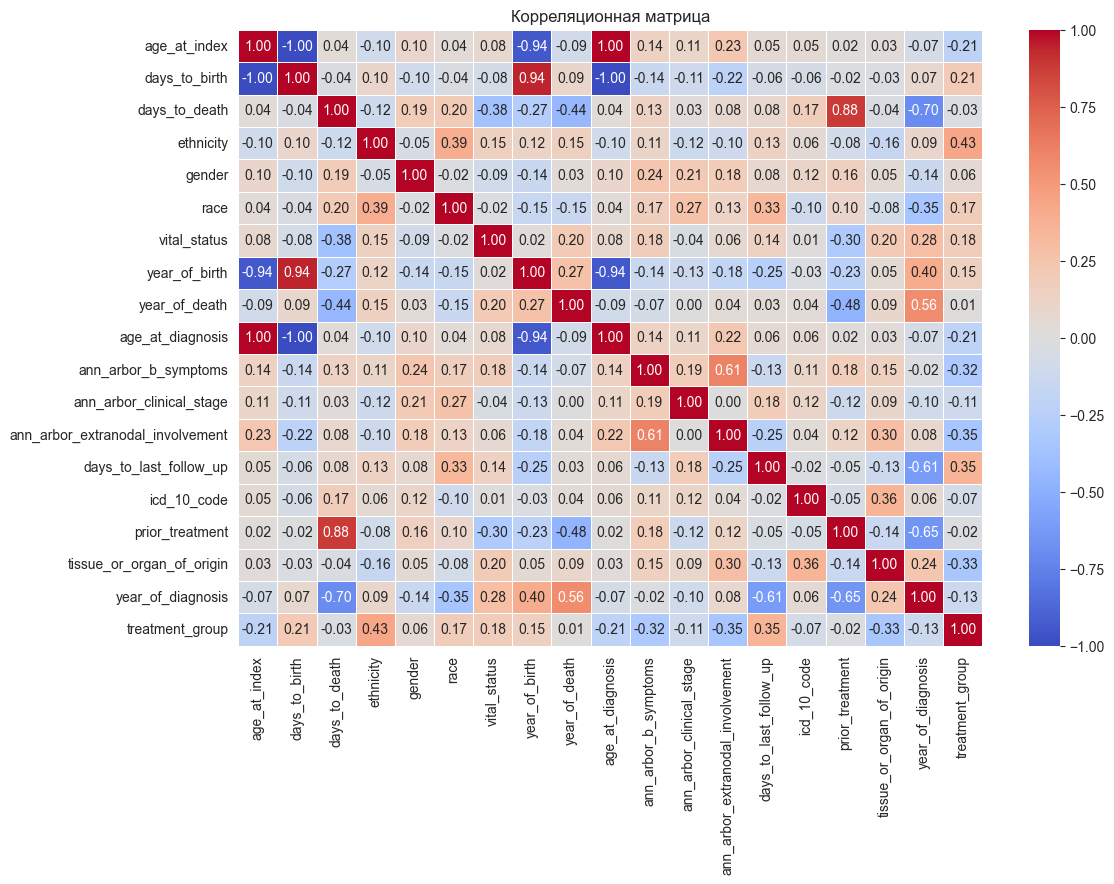

In [58]:
df_temp = df.drop(columns='ann_arbor_clinical_stage_str')
correlation_matrix = df_temp.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

#### large coeficients
age_at_index days_to_birth -1
age_at_index year_of_birth -0.94
age_at_index age_at_diagnosis 1
days_to_birth age_at_diagnosis -1
days_to_birth year_of_birth 0.94
days_to_death prior_treatment 0.88

In [59]:
# Оставим age_at_diagnosis так как он является самым понятным и прямым показателем возраста пациента на момент диагноза, что часто является важной информацией в медицинских исследованиях.
df = df.drop(columns=['age_at_index', 'days_to_birth', 'year_of_birth', 'prior_treatment'])
df.head()

,days_to_death,ethnicity,gender,race,vital_status,year_of_death,age_at_diagnosis,ann_arbor_b_symptoms,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,days_to_last_follow_up,icd_10_code,tissue_or_organ_of_origin,year_of_diagnosis,treatment_group,ann_arbor_clinical_stage_str
0,248.0,0,0,0,0,2009.0,22454,0,0,0,22.0,0,0,2013,1,Stage I
2,58.0,0,1,0,0,2009.0,27025,0,1,0,6.0,1,1,2013,1,Unknown
4,391.0,1,0,1,0,2012.0,10075,0,2,0,832.0,1,1,2011,1,Stage II
6,595.0,0,0,0,1,2009.0,21959,0,0,1,679.0,1,2,2011,1,Stage I
8,595.0,0,1,1,1,2009.0,24590,1,3,1,132.0,1,3,2012,1,Stage IV


In [60]:
# Описательная статистика для числовых столбцов
numeric_columns = ['age_at_diagnosis', 'days_to_last_follow_up', 'year_of_diagnosis']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
age_at_diagnosis,48.0,20731.354167,5107.471500,8493.0,16998.25,21146.5,24607.75,30256.0
days_to_last_follow_up,48.0,1228.291667,1251.001947,0.0,528.75,832.0,1425.00,5980.0
year_of_diagnosis,48.0,2009.145833,5.031770,1987.0,2009.00,2011.0,2012.00,2013.0


<b>Возраст при диагностировании (age_at_diagnosis)</b>

Среднее значение: 56.27 лет
Медиана: 57.5 лет
Минимальное значение: 23 года
Максимальное значение: 82 года
Интерквартильный размах (IQR): 46 - 67 лет

<b>Количество дней до последнего наблюдения (days_to_last_follow_up)</b>

Среднее значение: 1228.29 дней
Медиана: 832 дней
Минимальное значение: 0 дней
Максимальное значение: 5980 дней
Интерквартильный размах (IQR): 528.75 - 1425 дней

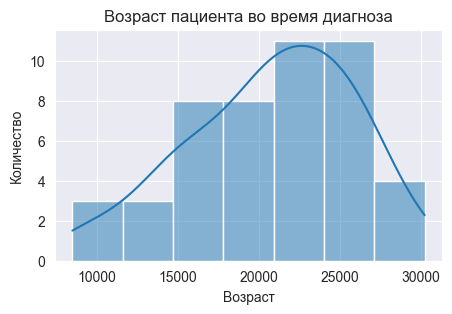

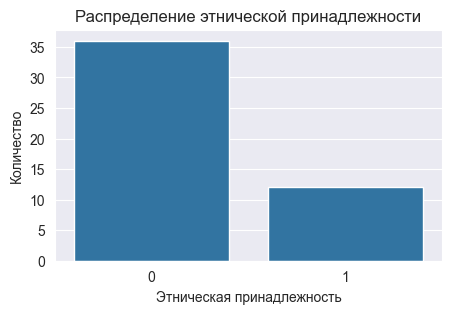

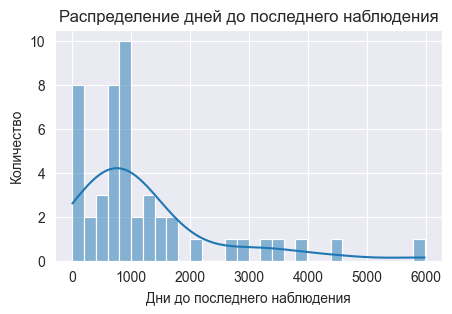

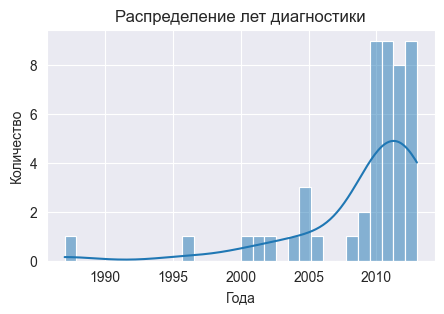

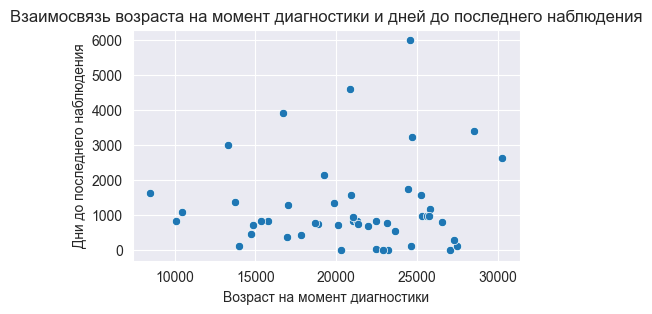

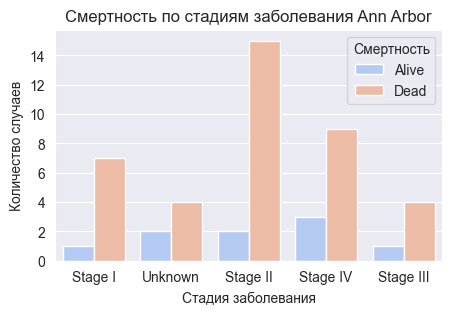

In [61]:
# Визуализация распределения возрастов
plt.figure(figsize=(5, 3))
sns.histplot(df['age_at_diagnosis'].dropna(), kde=True)
plt.title('Возраст пациента во время диагноза')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

# Визуализация распределения этнической принадлежности
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='ethnicity')
plt.title('Распределение этнической принадлежности')
plt.xlabel('Этническая принадлежность')
plt.ylabel('Количество')
plt.show()

# Визуализация распределения дней до последнего наблюдения
plt.figure(figsize=(5, 3))
sns.histplot(data=df, x='days_to_last_follow_up', bins=30, kde=True)
plt.title('Распределение дней до последнего наблюдения')
plt.xlabel('Дни до последнего наблюдения')
plt.ylabel('Количество')
plt.show()

# Визуализация распределения лет диагностики пациента
plt.figure(figsize=(5, 3))
sns.histplot(data=df, x='year_of_diagnosis', bins=30, kde=True)
plt.title('Распределение лет диагностики')
plt.xlabel('Года')
plt.ylabel('Количество')
plt.show()

# Взаимосвязь возраста на момент диагностики и дней до последнего наблюдения
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='age_at_diagnosis', y='days_to_last_follow_up')
plt.title('Взаимосвязь возраста на момент диагностики и дней до последнего наблюдения')
plt.xlabel('Возраст на момент диагностики')
plt.ylabel('Дни до последнего наблюдения')
plt.show()

# Создание графика зависимости смертности от стадии заболевания
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='ann_arbor_clinical_stage_str', hue='vital_status', palette='coolwarm')
plt.title('Смертность по стадиям заболевания Ann Arbor')
plt.xlabel('Стадия заболевания')
plt.ylabel('Количество случаев')
plt.legend(title='Смертность', labels=['Alive', 'Dead'])
plt.show()

### Гипотезы

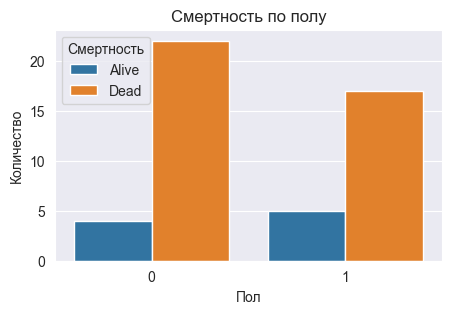

In [62]:
# Визуализация смертности по полу
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='gender', hue='vital_status')
plt.title('Смертность по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.legend(title='Смертность', labels=['Alive', 'Dead'])
plt.show()

In [63]:
# Проверка гипотезы о зависимости смертности от пола
contingency_table = pd.crosstab(df['gender'], df['vital_status'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

In [64]:
print("Chi2 value:", chi2)
print("p-value:", p)

Chi2 value: 0.07746100053792361
p-value: 0.7807681337146253


In [65]:
if p < 0.05:
    print("Есть значимая зависимость между полом и статусом жизнедеятельности.")
else:
    print("Нет значимой зависимости между полом и статусом жизнедеятельности.")

Нет значимой зависимости между полом и статусом жизнедеятельности.


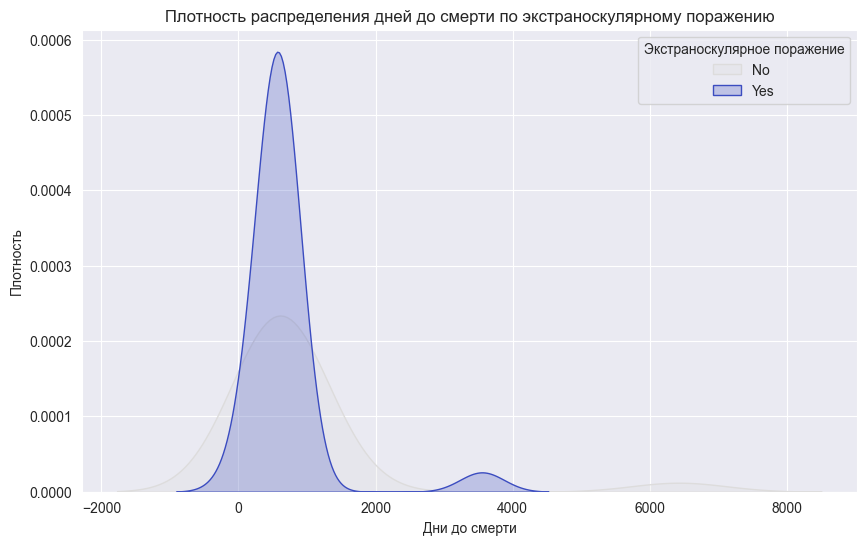

In [66]:
# Построение графика распределения дней до смерти по наличию экстраноскулярного поражения
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='days_to_death', hue='ann_arbor_extranodal_involvement', palette='coolwarm', fill=True)
plt.title('Плотность распределения дней до смерти по экстраноскулярному поражению')
plt.xlabel('Дни до смерти')
plt.ylabel('Плотность')
plt.legend(title='Экстраноскулярное поражение', labels=['No', 'Yes'])
plt.show()

Гипотеза (H1): Пациенты с экстраноскулярным поражением (всего или частично) имеют среднее время до смерти, отличающееся от пациентов без экстраноскулярного поражения. В частности, предположим, что наличие экстраноскулярного поражения связано с более коротким временем до смерти.

Нулевая гипотеза (H0): Наличие или отсутствие экстраноскулярного поражения не влияет на среднее время до смерти пациентов.

In [67]:
from scipy.stats import mannwhitneyu

# Разделение данных на две группы
group_no_extranodal = df[df['ann_arbor_extranodal_involvement'] == 0]['days_to_death']
group_yes_extranodal = df[df['ann_arbor_extranodal_involvement'] == 1]['days_to_death']

# Тест Уилкоксона-Манна-Уитни
stat, p_value = mannwhitneyu(group_no_extranodal, group_yes_extranodal)

print(f'Statistic: {stat}')
print(f'P-value: {p_value}')

Statistic: 220.5
P-value: 0.16593065880934477


In [68]:
if p < 0.05:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Мы не отвергаем нулевую гипотезу.")

Мы не отвергаем нулевую гипотезу.
